## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 4: Linear Algebra
## Due November 3, 2024 by 11:59 PM
### <span style="color: red">Enrique Antunano</span>

Copyright &copy; 2024, University of Washington

<hr>

**Instructions**: Please use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="color: red'">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate.
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order.


### 0. Warmup (Do not turn in)

- Make sure you download, read, and run the notebook for lecture 4. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory subset the general subject of Linear Algebra, for example covered in the following online books:
    - [Beezer](http://linear.ups.edu/html/fcla.html). Does not cover matrix exponentials, Caley-Hamilton, SVD, or PCA.
    - [Hefferon](http://joshua.smcvt.edu/linearalgebra/book.pdf). Also does not cover the above.
- The more advanced ideas are covered online as well. For example:
    - Matrix Exponentials are typically not covered until a course on linear different equations. But the [Wikipedia page](https://en.wikipedia.org/wiki/Matrix_exponential) is pretty good.
    - [Caley-Hamilton](https://brilliant.org/wiki/cayley-hamilton-theorem/)
    - [SVD](https://www.cs.cmu.edu/~venkatg/teaching/CStheory-infoage/book-chapter-4.pdf)
    - [PCA](https://medium.com/@jonathan_hui/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491)
- If you want the **best** textbooks in linear algebra, get
    - [Strang](https://www.amazon.com/Introduction-Linear-Algebra-Gilbert-Strang/dp/0980232775). Introductory. See also [Strang's Online Lectures](https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/).
    - [Horn and Johnson](http://www.cse.zju.edu.cn/eclass/attachments/2015-10/01-1446086008-145421.pdf)

In [1]:
import math
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline

### 1. Linear independence
---

Which of the following sets of vectors are linearly independent? Why?

a) $\left (\begin{array}{c}
1 \\
2 \\
3 \\
4\end{array}\right )$ and
$\left (\begin{array}{c}
5 \\
6 \\
7 \\
8\end{array}\right )$

b) $\left (\begin{array}{c}
1 \\
1 \\
0 \\
0
\end{array}\right )$,  $\left (\begin{array}{c}
0 \\
0 \\
1 \\
1
\end{array}\right )$,
$\left (\begin{array}{c}
0 \\
1 \\
1 \\
0
\end{array}\right )$ and $\left (\begin{array}{c}
1 \\
0 \\
0 \\
1
\end{array}\right )$

c)
$\left (\begin{array}{c}
1 \\
1 \\
0 \\
0
\end{array}\right )$, $\left (\begin{array}{c}
0 \\
0 \\
1 \\
1
\end{array}\right )$, $\left (\begin{array}{c}
0 \\
1 \\
1 \\
0
\end{array}\right )$ and $\left (\begin{array}{c}
0 \\
1 \\
0 \\
1
\end{array}\right )$

In [10]:
# Convert matrix A,B, and C composed of vectors in set S_A, S_B, and S_C into Reduced Row-Echelon Form (RREF)
# Matrix A composed of vectors in set S_A
A = sm.Matrix([[1,5],[2,6],[3,7],[4,8]])
# Convert Matrix to RREF
A_rref = A.rref()

# Matrix B composed of vectors in set S_B
B = sm.Matrix([[1,0,0,1],[1,0,1,0],[0,1,1,0],[0,1,0,1]])
# Convert Matrix to RREF
B_rref = B.rref()

# Matrix C composed of vectors in set S_C
C = sm.Matrix([[1,0,0,0],[1,0,1,1],[0,1,1,0],[0,1,0,1]])
# Convert Matrix to RREF
C_rref = C.rref()

# Print matrices in RREF
print("The Row echelon form of matrix " + "A" + " and the pivot columns : {}".format(A_rref))
print("The Row echelon form of matrix " + "B" + " and the pivot columns : {}".format(B_rref))   
print("The Row echelon form of matrix " + "C" + " and the pivot columns : {}".format(C_rref))   

The Row echelon form of matrix A and the pivot columns : (Matrix([
[1, 0],
[0, 1],
[0, 0],
[0, 0]]), (0, 1))
The Row echelon form of matrix B and the pivot columns : (Matrix([
[1, 0, 0,  1],
[0, 1, 0,  1],
[0, 0, 1, -1],
[0, 0, 0,  0]]), (0, 1, 2))
The Row echelon form of matrix C and the pivot columns : (Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]]), (0, 1, 2, 3))


a) Represent set of vectors $S$ in matrix form as matrix $A$
Row Reduce Matrix $A$
$$ A = 
\begin{bmatrix}
1 & 5 \\
2 & 6 \\
3 & 7 \\
4 & 8
\end{bmatrix}
\xrightarrow{\text{RREF}}
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
0 & 0 \\
0 & 0
\end{bmatrix}
$$

The set $S_A$ is linearly independent. 
<br><br>
The set of vectors which form the coefficient matrix are not related and cannot be described in terms of the other vector coefficients. More formally, the coefficient matrix $A$ has two variables, $n$, while the reduced row-echelon form of matrix $A$, $A_{rref}$, has two rows $r$ that are not all zeroes. The number of free variables can be found by $n-r = 2-2 = 0$, meaning there are zero free variables in the solution set and $A$ has a unique solution. Since $A$ has a unique solution, the set $S$ is linearly independent since there are no set of scalars to make the system of equations equal to zero.

b) Represent set of vectors $S$ in matrix form as matrix $B$
Row Reduce Matrix $B$
$$ B = 
\begin{bmatrix}
1 & 0 & 0 & 1\\
1 & 0 & 1 & 0\\
0 & 1 & 1 & 0\\
0 & 1 & 0 & 1
\end{bmatrix}
\xrightarrow{\text{RREF}}
\begin{bmatrix}
1 & 0 & 0 & 1 \\
0 & 1 & 0 & 1 \\
0 & 0 & 1 & -1\\
0 & 0 & 0 & 0
\end{bmatrix}
$$

The set $S_B$ is linearly dependent.
<br><br>
The set of vectors which form the coefficient matrix are related and can be described in terms of the other vector coefficients. More formally, the coefficient matrix $B$ has four variables, $n$, while the reduced row-echelon form of matrix $B$, $B_{rref}$, has three rows $r$ that are not all zeroes. The number of free variables can be found by $n-r = 4-3 = 1$, meaning there is one free variables in the solution set and $B$ does not have a unique solution. Coefficients $a_{1},a_{2}, and a_{3}$ can be described in terms of $a_$4$, meaning there are infinite number of solutions. 
$$\begin{matrix}
a_1 = a_4 \\
a_2 = a_4 \\
a_3 = -a_4
\end{matrix}
$$
<br><br>
Since $B$ has an infinite number of solutions, the set $S_B$ is linearly dependent since there are sets of scalars to make the system of equations equal to zero.

c) Represent set of vectors $S$ in matrix form as matrix $C$
Row Reduce Matrix $C$
$$ C = 
\begin{bmatrix}
1 & 0 & 0 & 0\\
1 & 0 & 1 & 1\\
0 & 1 & 1 & 0\\
0 & 1 & 0 & 1
\end{bmatrix}
\xrightarrow{\text{RREF}}
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
$$

The set $S_C$ is linearly independent.
<br><br>
Same arguement as a), except $n = 4$ and $r = 4$. The number of free variables is the same though $n-r=4-4=0$, meaning all four variables in the set $S_C$ have a unique solution and thus the set is linearly independent.

### 2. Orthogonality
---

a) Find two orthogonal vectors that are also orthogonal to the vector
$$v = \left (
\begin{array}{c}
1 \\
-1 \\
3 \\
\end{array}
\right ).$$

b) Argue that the resulting set of three vectors form a basis for for $\mathbb{R}^3$.

c) Express the vector $$x = \left (
\begin{array}{c}
1 \\
2 \\
3
\end{array}
\right)$$ as a linear combination of your three vectors.

In [44]:
# a) Check dot product of vectors u and v
v_t = np.array([
    [1] ,
    [-1],
    [3]
]).transpose()

v = np.array([
    [1] ,
    [-1],
    [3]
])

u = np.array([
    [-3],
    [3] ,
    [2]
])

u_t = np.array([
    [-3],
    [3] ,
    [2]
]).transpose()

t = np.array([
    [-11],
    [-11],
    [0]
])

v_dot_u = np.dot(v_t,u)
v_dot_t = np.dot(v_t,t)
print("Set v dot set u is equal to: ", v_dot_u)
print("Set v dot set t is equal to: ", v_dot_t)

# b) Orthogonal vectors grouped into the same set must be linearly independent, as shown in Reduce Row-Echelon Form below 
# Matrix C composed of vectors in set S_C
D = sm.Matrix([[1,-3,-11],[-1,3,-11],[3,2,0]])
# Convert Matrix to RREF
D_rref = D.rref()

# Print matrices in RREF
print("The Row echelon form of matrix " + "D" + " and the pivot columns : {}".format(D_rref))


Set v dot set u is equal to:  [[0]]
Set v dot set t is equal to:  [[0]]
The Row echelon form of matrix D and the pivot columns : (Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]), (0, 1, 2))


a) Vector $u$ is orthogonal to vector $v$ 
$$u = \left ( \begin{array}{c}
-3 \\
3 \\
2 \\
\end{array}
\right )$$
The vector $t$ is orthogonal to vector $v$
$$t = \left ( \begin{array}{c}
-11 \\
-11 \\
0 \\
\end{array}
\right )$$

Both vectors are confirmed to be orthognal to $v$ because the dot product is equal to $0$, as shown in python code above.

b) The set of three vectors, represented by the coefficient matrix $D$, is linearly independent. The RREF of matrix $D$, as shown in the python code above, demonstrates that there exits only one unique solution. There are no scalars to the system of equations, represented by matrix $D$, which will equal to zero, other than all the scalars being set to zero. 
<br><br>
Since all three vectors are linearly independent from each other, it matches the defintion of a $basis$ for the vector space $S$ consisting of vectors $v,u,t$.

c) $x = \frac{8}{11}v + \frac{9}{22}u - \frac{3}{22}t$
<br><br>
$\placeholder_err [take image of math that expresses vector x as a linear combo]$ 

### 3. Inverses
---
Find the inverse of each of the following matrices, or explain why no inverse exists.

$
A = \begin{pmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{pmatrix}
$

$ B = \begin{pmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & -1 & 0
\end{pmatrix}
$

In [43]:
# AJ = I; A = nxn matrix in question | J: matrix formed from final n columns of matrix N | I: indentity matrix
# M = nx2n matrix formed by placing nxn Matrix A to the left of nxn Matrix I
# N = row-equivalent RREF of M

# Declare matrix M from matrix A
M = sm.Matrix([[0,1,1,1,0,0],[1,0,1,0,1,0],[1,1,0,0,0,1]])
# Solve for matrix N, the row row-equivalent RREF of M
N_rref = M.rref()
print("Matrix N_A: \n",N_rref)

# Only keep matrix J from matrix N
A_inv = N_rref[0][:,3:]
print("Matrix A's inverse \n",A_inv)

# Declare matrix M from matrix B
M = sm.Matrix([[0,1,1,1,0,0],[1,0,1,0,1,0],[1,-1,0,0,0,1]])
# Solve for matrix N, the row row-equivalent RREF of M
N_rref = M.rref()
print("\n\n\n")
print("Matrix N_B: \n",N_rref)

B_aug = sm.Matrix([[0,1,1],[1,0,1],[1,-1,0]])
B_aug_rref = B_aug.rref()
print("Augmented Matrix B in RREF: ",B_aug_rref)

Matrix N_A: 
 (Matrix([
[1, 0, 0, -1/2,  1/2,  1/2],
[0, 1, 0,  1/2, -1/2,  1/2],
[0, 0, 1,  1/2,  1/2, -1/2]]), (0, 1, 2))
Matrix A's inverse 
 Matrix([[-1/2, 1/2, 1/2], [1/2, -1/2, 1/2], [1/2, 1/2, -1/2]])




Matrix N_B: 
 (Matrix([
[1, 0, 1, 0,  1,  0],
[0, 1, 1, 0,  1, -1],
[0, 0, 0, 1, -1,  1]]), (0, 1, 3))
Augmented Matrix B in RREF:  (Matrix([
[1, 0, 1],
[0, 1, 1],
[0, 0, 0]]), (0, 1))


a) Matrix $A$ inverse 
$$A^{-1} =
\begin{pmatrix}
-\frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\
\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} \\
\frac{1}{2} & \frac{1}{2} & -\frac{1}{2}
\end{pmatrix}$$

b) Matrix $B$ has no inverse. First, I knew matrix B was square nxn matrix. So I assumed matrix B was a nonsingular matrix. This would allow its inverse to be calculated through $\textit{Theorem CINM Computing the Inverse of a Nonsingular Matrix}$ from $\textit{A First Course in Linear Algebra}$, but the augmented matrix of of B was inconsistent. This does not show matrix B is noninverse.
<br><br>
Looking at matrix $B$, the matrix is not linearly independent since the vector variables $x_1$ and $x_2$, can be described in terms of $x_3$ since $x_3$ is a free variable.
<br><br>
According to the nonsingular matrix equivalences, if $B$ is a square matrix then the following are equivalent: 1) $B$ is nonsingular, 2) the columns of $B$ are a linearly independent set, 3) $B$ is invertible. Just looking at these three of six properities, matrix $B$ fails the second one, thus this means $B$ is singular and non-invertible. 


### 4. Commutativity
---

In three dimensions, there are three different kinds of **rotations**, one for rotation about each axis. These are defined as follows:

$$
R_x(\theta) =
\begin{pmatrix}
1 & 0 & 0 \\
0 & \cos \theta  & \sin \theta  \\
0 & -\sin \theta & \cos \theta
\end{pmatrix}.
$$

$$
R_y(\theta) =
\begin{pmatrix}
\cos \theta  & 0 & \sin \theta \\
0 & 1 & 0 \\
-\sin \theta & 0 & \cos \theta
\end{pmatrix}.
$$

$$
R_z(\theta) =
\begin{pmatrix}
\cos \theta  & \sin \theta & 0 \\
-\sin \theta & \cos \theta & 0 \\
0 & 0 & 1
\end{pmatrix}.
$$

Are these matrices pairwise commutative in general? That is: is it the case that

$$
R_x(\theta_1)R_y(\theta_2) = R_y(\theta_2)R_x(\theta_1)
$$

and similarly for $x,z$ and $y,z$? Explain your answers.

In [86]:
# Declare theta for each rotation
theta_x = (np.pi)
theta_y = np.pi
theta_z = (np.pi)

# Declare rotation matrices
Rx = np.array([
    [1,0,0],
    [0,np.cos(theta_x),np.sin(theta_x)],
    [0,-np.sin(theta_x),np.cos(theta_x)]
])
Ry = np.array([
    [np.cos(theta_y),0,np.sin(theta_y)],
    [0,1,0],
    [-np.sin(theta_y),0,np.cos(theta_y)]
])
Rz = np.array([
    [np.cos(theta_z),np.sin(theta_z),0],
    [-np.sin(theta_z),np.cos(theta_z),0],
    [0,0,1]
])
# Rx and Ry Multiplications
RxRy = np.dot(Rx,Ry)
print("Rx(theta_x)Ry(theta_y): \n",RxRy)
RyRx = np.dot(Ry,Rx)
print("Ry(theta_y)Rx(theta_x): \n",RyRx)

# Ry and Rz Multiplicatios
RyRz = np.dot(Ry,Rz)
print("\n\nRx(theta_y)Rz(theta_z): \n",RyRz)
RzRy = np.dot(Rz,Ry)
print("Rz(theta_z)Ry(theta_y): \n",RzRy)

# Rx and Rz Multiplications
RxRz = np.dot(Rx,Rz)
print("\n\nRx(theta_x)Rz(theta_z): \n",RxRz)
RzRx = np.dot(Rz,Rx)
print("Rz(theta_z)Rx(theta_x): \n",RzRx)


Rx(theta_x)Ry(theta_y): 
 [[-1.00000000e+00  0.00000000e+00  1.22464680e-16]
 [-1.49975978e-32 -1.00000000e+00 -1.22464680e-16]
 [ 1.22464680e-16 -1.22464680e-16  1.00000000e+00]]
Ry(theta_y)Rx(theta_x): 
 [[-1.00000000e+00 -1.49975978e-32 -1.22464680e-16]
 [ 0.00000000e+00 -1.00000000e+00  1.22464680e-16]
 [-1.22464680e-16  1.22464680e-16  1.00000000e+00]]


Rx(theta_y)Rz(theta_z): 
 [[ 1.00000000e+00 -1.22464680e-16  1.22464680e-16]
 [-1.22464680e-16 -1.00000000e+00  0.00000000e+00]
 [ 1.22464680e-16 -1.49975978e-32 -1.00000000e+00]]
Rz(theta_z)Ry(theta_y): 
 [[ 1.00000000e+00  1.22464680e-16 -1.22464680e-16]
 [ 1.22464680e-16 -1.00000000e+00 -1.49975978e-32]
 [-1.22464680e-16  0.00000000e+00 -1.00000000e+00]]


Rx(theta_x)Rz(theta_z): 
 [[-1.00000000e+00  1.22464680e-16  0.00000000e+00]
 [ 1.22464680e-16  1.00000000e+00  1.22464680e-16]
 [ 1.49975978e-32  1.22464680e-16 -1.00000000e+00]]
Rz(theta_z)Rx(theta_x): 
 [[-1.00000000e+00 -1.22464680e-16  1.49975978e-32]
 [-1.22464680e-16  

### 5. Orthogonal Matrices
---

The set of **reflection matrices** is defined by

$$
S(\theta) =
\begin{pmatrix}
\cos 2\theta & \sin 2 \theta \\
\sin 2\theta & -\cos 2 \theta
\end{pmatrix}.
$$

a) Show how $S(\frac{\pi}{4})$ transforms the vector $(1\;-1)^T$.

b) Show that $S(\theta)$ does not change any vectors that happen to lie on the axis of reflection.

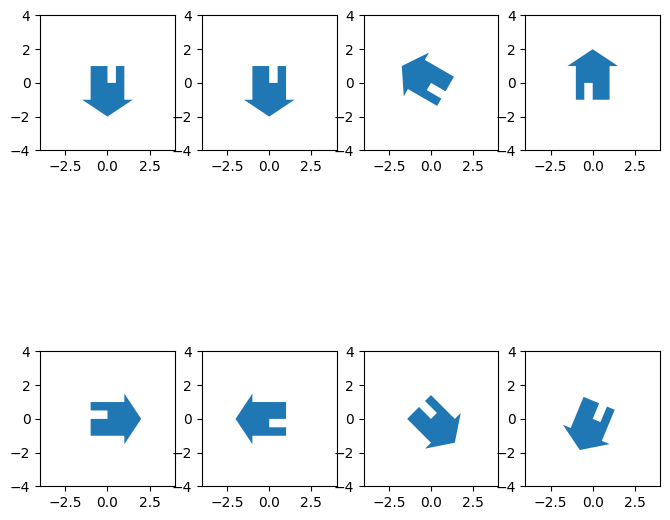

In [114]:
points = np.array([
    [-1,-1],
    [0,-1],
    [0,0],
    [0.5,0],
    [0.5,-1],
    [1,-1],
    [1,1],
    [1.5,1],
    [0,2],
    [-1.5,1],
    [-1,1]
])

rotations = [
    0,
    np.pi,
    -4*np.pi/3,
    np.pi/2,
    np.pi/4,
    -np.pi/4,
    np.pi/8,
    -np.pi/16,
]

# Define reflection matrix
def R(theta):
    return np.array([
        [np.cos(2*(theta)), np.sin(2*(theta))],
        [np.sin(2*(theta)), -np.cos(2*(theta))]
    ])

fig,ax = plt.subplots(2,4,figsize=(8,8))

for i in range(8):
    new_points = [np.dot(R(rotations[i]),p) for p in points]
    shape = pch.Polygon(new_points)
    a = ax[int(i/4),i%4]
    a.add_artist(shape)
    a.set_xlim(-4,4)
    a.set_ylim(-4,4)
    a.set_aspect(1)

### 6. Similarity
---

Show that the following two matrices are similar.

$
A = \begin{pmatrix}
2 & 4 & 6 \\
0 & 2 & 0 \\
1 & 1 & 0
\end{pmatrix}
$

$
B = \begin{pmatrix}
1 & -1 & 2 \\
4 & 2 & 1 \\
5 & 1 & 1
\end{pmatrix}
$

In [181]:
x = sm.symbols("x")
# Solve for characteristic polynomial of sets A and B
A = sm.Matrix([[2,4,6],[0,2,0],[1,1,0]])
B = sm.Matrix([[1,-1,2],[4,2,1],[5,1,1]])
S = sm.Matrix(np.random.randint(-1,1,(3,3)))

while S.det() == 0: # Make sure S is invertible
    S = sm.Matrix(np.random.randint(-5,5,(3,3)))

# Matrix will verify B = B_check = S^-1 * A * S
B_check =  S.inv() * A * S

print(B_check)


Matrix([[2, 0, 0], [4, 2, 6], [1, 1, 0]])


### 7. Diagonalization
---

Diagonalize the matrices in problem 6 (you can use `sympy`), and show they have the same diagonal form.

In [186]:
# Solve for characteristic polynomial of sets A and B
A = sm.Matrix([[2,4,6],[0,2,0],[1,1,0]])
B = sm.Matrix([[1,-1,2],[4,2,1],[5,1,1]])

P_A, D_A = A.diagonalize()
R_B, D_B = B.diagonalize()

D_A, D_B


⎛⎡2    0       0   ⎤  ⎡2    0       0   ⎤⎞
⎜⎢                 ⎥  ⎢                 ⎥⎟
⎜⎢0  1 - √7    0   ⎥, ⎢0  1 - √7    0   ⎥⎟
⎜⎢                 ⎥  ⎢                 ⎥⎟
⎝⎣0    0     1 + √7⎦  ⎣0    0     1 + √7⎦⎠

### 8. Cayley Hamilton
---

a) Use the **Cayley-Hamilton Theorem** to come up with an expression for $A^n$ in terms of $n$ when

$$
A = \begin{pmatrix}
-\frac{1}{2} & 1  \\
0 & \frac{1}{4}
\end{pmatrix} .
$$

b) Define $x_{k+1} = A x_k$ and argue that no matter what value $x_0$ is, $x_k$ converges to $(0 \; 0)^T$.

c) Choose $x_0 = (-2,3)^T$ and plot $x_k$ for $k = 0$ to $10$. Plot the two components of of $x_k$ as two separate trajectories overlaid on the same plot.

### 9. Matrix Exponential Properties
---

Recall that for matrices $A$ and $B$  it is not necessarily the case that $AB = BA$ (i.e. that $A$ and $B$ commute). Show that

a) If $AB=BA$ then $e^Ae^B = e^Be^A$ using the definition of the matrix exponential as a series.

b) Find an example in 2D where $A$ and $B$ do not commute and show that $e^Ae^B \neq e^Be^A$.

### 10. Senators Revisited
---

Repeat the clustering of senators by voting habit for the years 1999, 1979 and 1959. Plot them together with the 2019 plot in a grid of plots. Which years seem the most divided?

Note: you will need to get the data at [https://voteview.com/data](https://voteview.com/data). Choose "Member's Votes", "Senate Only", the desired year, and CSV file.

I had to edit the CSV file (in a text editor or ExCEL) to remove the heading in the first row before loading the file.